# Lesson: Data Science Libraries - ADVANCED DataFrameS

<a href = "https://www.canva.com/design/DAFvqkQfIsA/QM1rBIZQX8uNBjdgg1gPEg/view?utm_content=DAFvqkQfIsA&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink">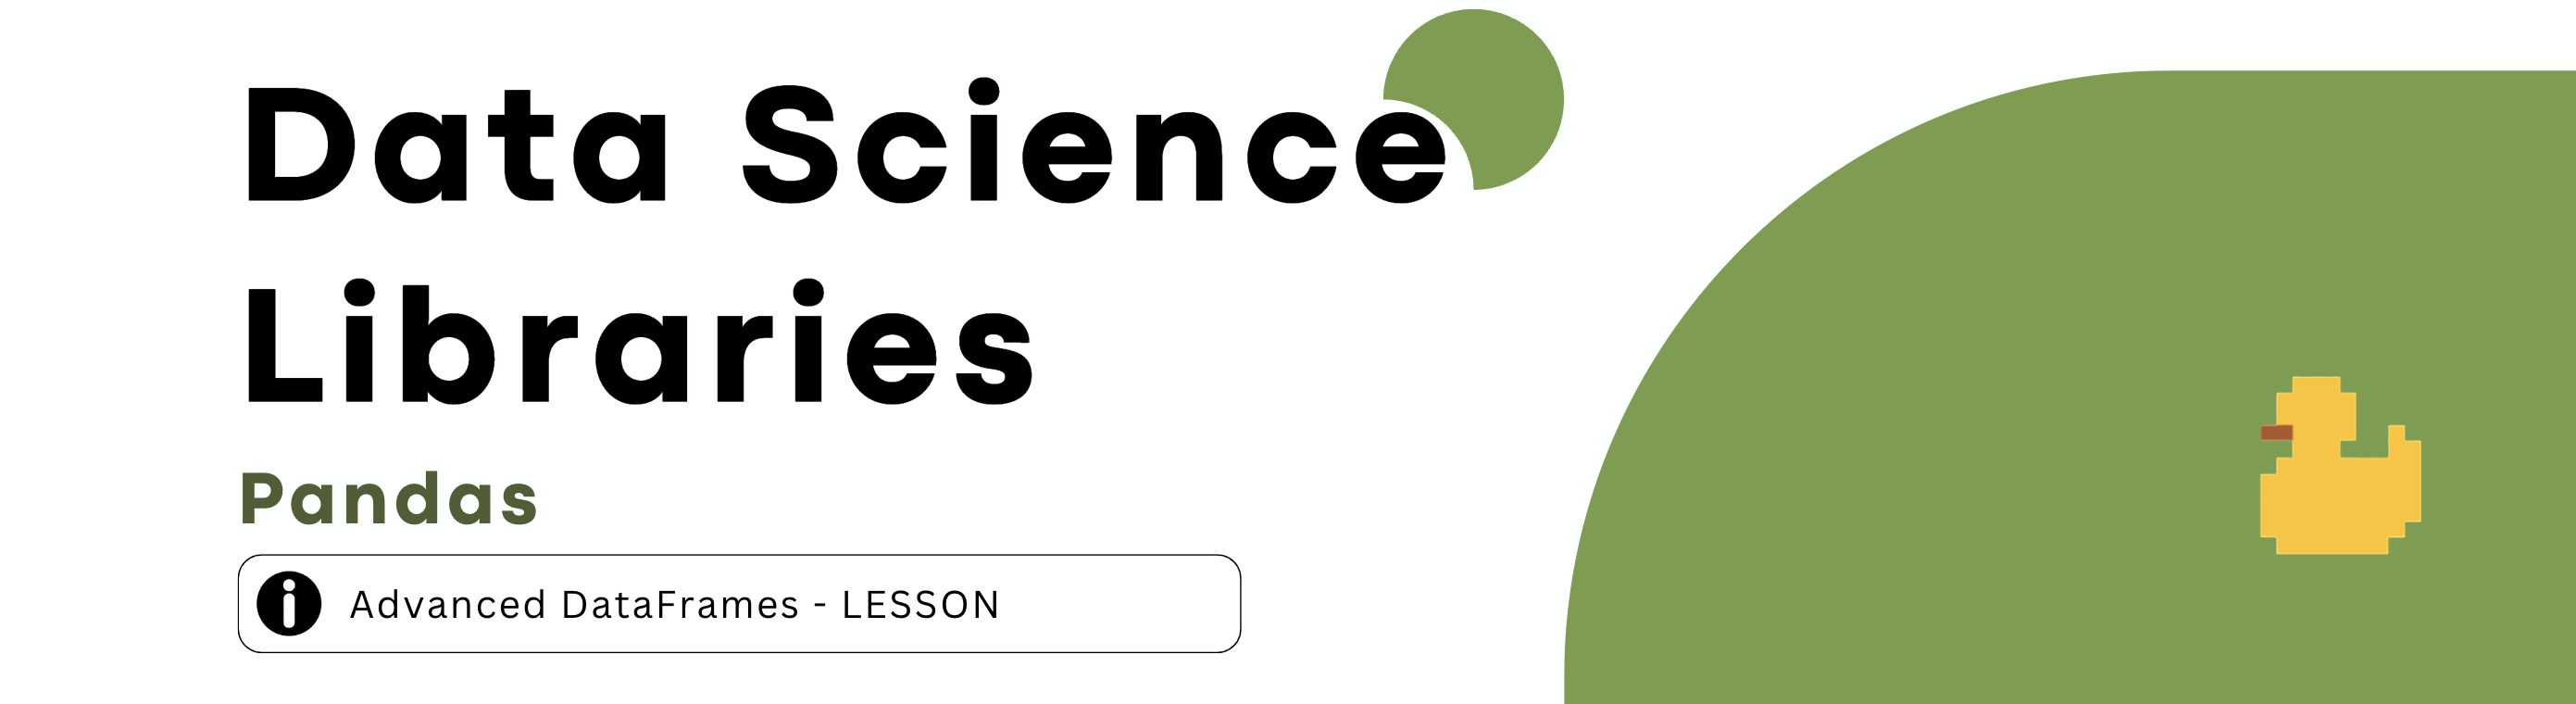</a>

<hr style="border:2px solid gray">

# Part 2 - Manipulating DataFrames
- subsetting
- indexing
- aggregrating
- combining dfs

In [1]:
#standard imports
import pandas as pd
import numpy as np

np.random.seed(123)

In [2]:
# Create list of values for names column.
students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

# Randomly generate arrays of scores for each student for each subject.
# Note that all the values need to have the same length here.
math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))

# Randomly generate if a student is in classroom A or classroom B
classroom = np.random.choice(['A', 'B'], len(students))

df = pd.DataFrame({'name':students,
                   'math':math_grades,
                   'reading':reading_grades,
                   'english':english_grades,
                   'room':classroom})
df

,name,math,reading,english,room
0,Sally,62,80,85,A
1,Jane,88,67,79,B
2,Suzie,94,95,74,A
3,Billy,98,88,96,B
4,Ada,77,98,92,A
5,John,79,93,76,B
6,Thomas,82,81,64,A
7,Marie,93,90,63,A
8,Albert,92,87,62,A
9,Richard,69,94,80,A


___
## Subsetting
*(Filtering a DataFrame)*

In [3]:
# Dot Notation = Series
df.math # JUST returns the math column from the df dataframe

0     62
1     88
2     94
3     98
4     77
5     79
6     82
7     93
8     92
9     69
10    92
11    92
Name: math, dtype: int64

In [4]:
# Bracket notation will also create a Series
df['math'] #ALSO returns the math column from the df dataframe

0     62
1     88
2     94
3     98
4     77
5     79
6     82
7     93
8     92
9     69
10    92
11    92
Name: math, dtype: int64

In [6]:
# Unless you are passing a list as a mask! This will return a DF
df[['math', 'reading', 'english']]#this is how you make it look pretty. You can also choose multiple columns.

,math,reading,english
0,62,80,85
1,88,67,79
2,94,95,74
3,98,88,96
4,77,98,92
5,79,93,76
6,82,81,64
7,93,90,63
8,92,87,62
9,69,94,80


### Subsetting using boolean masking

we love boolean masking! 

1. select SINGLE column to perform conditional statement
2. perform conditional statement (should result in series of booleans!)
3. save mask
4. apply back to DataFrame

#### Filter a subset of the DataFrame with everyone in room B
1. select room column
2. find all rooms that are B
3. mask = all rooms that are B
4. df [mask]

In [9]:
mask
mask

NameError: name 'mask' is not defined

#### Filter a subset of the DataFrame with everyone who is passing math

In [7]:
df[df.math > 69]

,name,math,reading,english,room
1,Jane,88,67,79,B
2,Suzie,94,95,74,A
3,Billy,98,88,96,B
4,Ada,77,98,92,A
5,John,79,93,76,B
6,Thomas,82,81,64,A
7,Marie,93,90,63,A
8,Albert,92,87,62,A
10,Isaac,92,93,99,B
11,Alan,92,72,62,A


### Using `np.where`

Return an array based on a condition
- format: `np.where(condition, output_if_TRUE, output_if_FALSE)`

#### Filter a subset of the DataFrame with everyone who is passing math using `np.where`
1. create array using condition
2. attach array to df as column
3. filter on new column

In [10]:
#create array based on condition
np.where(df.math > 69, "YES", "NO")

array(['NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES'], dtype='<U3')

In [11]:
#attach to df
df['passing_math'] = np.where(df.math > 69, "YES", "NO")

In [12]:
df.head()

,name,math,reading,english,room,passing_math
0,Sally,62,80,85,A,NO
1,Jane,88,67,79,B,YES
2,Suzie,94,95,74,A,YES
3,Billy,98,88,96,B,YES
4,Ada,77,98,92,A,YES


In [13]:
#filter on new column
df[df.passing_math == 'YES']

,name,math,reading,english,room,passing_math
1,Jane,88,67,79,B,YES
2,Suzie,94,95,74,A,YES
3,Billy,98,88,96,B,YES
4,Ada,77,98,92,A,YES
5,John,79,93,76,B,YES
6,Thomas,82,81,64,A,YES
7,Marie,93,90,63,A,YES
8,Albert,92,87,62,A,YES
10,Isaac,92,93,99,B,YES
11,Alan,92,72,62,A,YES


### Drop `passing_math` column

In [21]:
df.drop(columns = ['passing_math'])

KeyError: "['passing_math'] not found in axis"

___
## Indexing using `.loc` and `.iloc`

Filter a subset of the DataFrame using indexing

Indexing using `.loc`

- Using the **NAME** of the index and columns, filter subset

- format: `df.loc[row_indexer_NAME, column_indexer_NAME]`

Indexing using `.iloc`

- Using the **POSITION** of the index and columns, filter subset

- format: `df.iloc[row_indexer_POSITION, column_indexer_POSITION]`

In [ ]:
#set new index for demo
df 
df

### `.loc`: access subset by row and column NAME

In [ ]:
#.loc[row_name,column_name]
# Index = specific row/col is called



In [ ]:
#range = SLICING!


In [ ]:
# Slice df rows, then index for specific cols!



In [ ]:
# Slice by rows only


In [ ]:
# Slice by columns only
# ":" is asking for all rows



### `.iloc`: access subset by row and column POSITION

In [ ]:
#range


In [ ]:
#by rows only


In [ ]:
#by columns only


### summary of `.loc` and `.iloc`

- `.loc`: takes the NAME of the row and column index
    - this is inclusive
- `.iloc`: takes the POSITION of the row and column index
    - this is exclusive


- both format: `[row:row, column:column]`

#### setting our index back to a incremental count

- when using `.loc` on an index that is 0,1,2, etc, it still works because the row name is just that integer value

___
## Aggregating

### `.agg` method 

- allows us specify a way to aggregate a series of numerical values

#### find the min math score

In [ ]:
#what you already know


In [ ]:
#using agg


#### find the min and max math score

In [ ]:
#contain multiple agg functions in a list



#### find the min, max, and average scores of all subjects

#### select subjects using iloc

### Transposing: make the subjects the index


___
### `.groupby` function
- used for grouping the data according to the categories and apply a function to the categories

#### `groupby` room column

> what does this output mean?

#### find max scores by room using `groupby`

format: `df.groupby('column_name').agg_function()`

#### specify subjects only

#### can also combine with `agg` 

#### can also combine with describe

___
## Combining DataFrames

How we combine DataFrames together

### `pd.concat`

- adds two DataFrames
- adds them along either axis
    - row-wise (axis=0) aka on top of each other 
    - column-wise (axis=1) aka next to each other
- intial DataFrames are completely intact afterwards
    
 
format: `pd.concat([df1,df2], axis=#)`

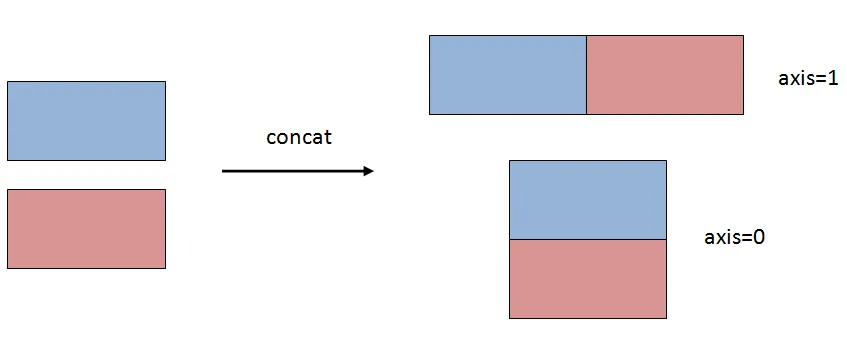

#### `concat` two dfs row-wise (keep all the rows)
This performs a SQL `UNION ALL`

In [ ]:
# pd.concat([df1,df2], axis=0): default = 0


> what do you notice about the index?

#### reset the index

- generally want to reset the index to ensure it has all unique values

#### SQL `UNION` will remove duplicate rows, let's recreate that in pandas:

#### concat two dfs column-wise (keep all the columns)

In [ ]:
# pd.concat([df1,df2], axis=1)
# default join = 'outer'


In [ ]:
#always joins on the INDEX


### `pd.merge`

- combines two DataFrames like a SQL join    
 
format: `pd.merge(df_1, df_2, how='join_type', on='column_name')`

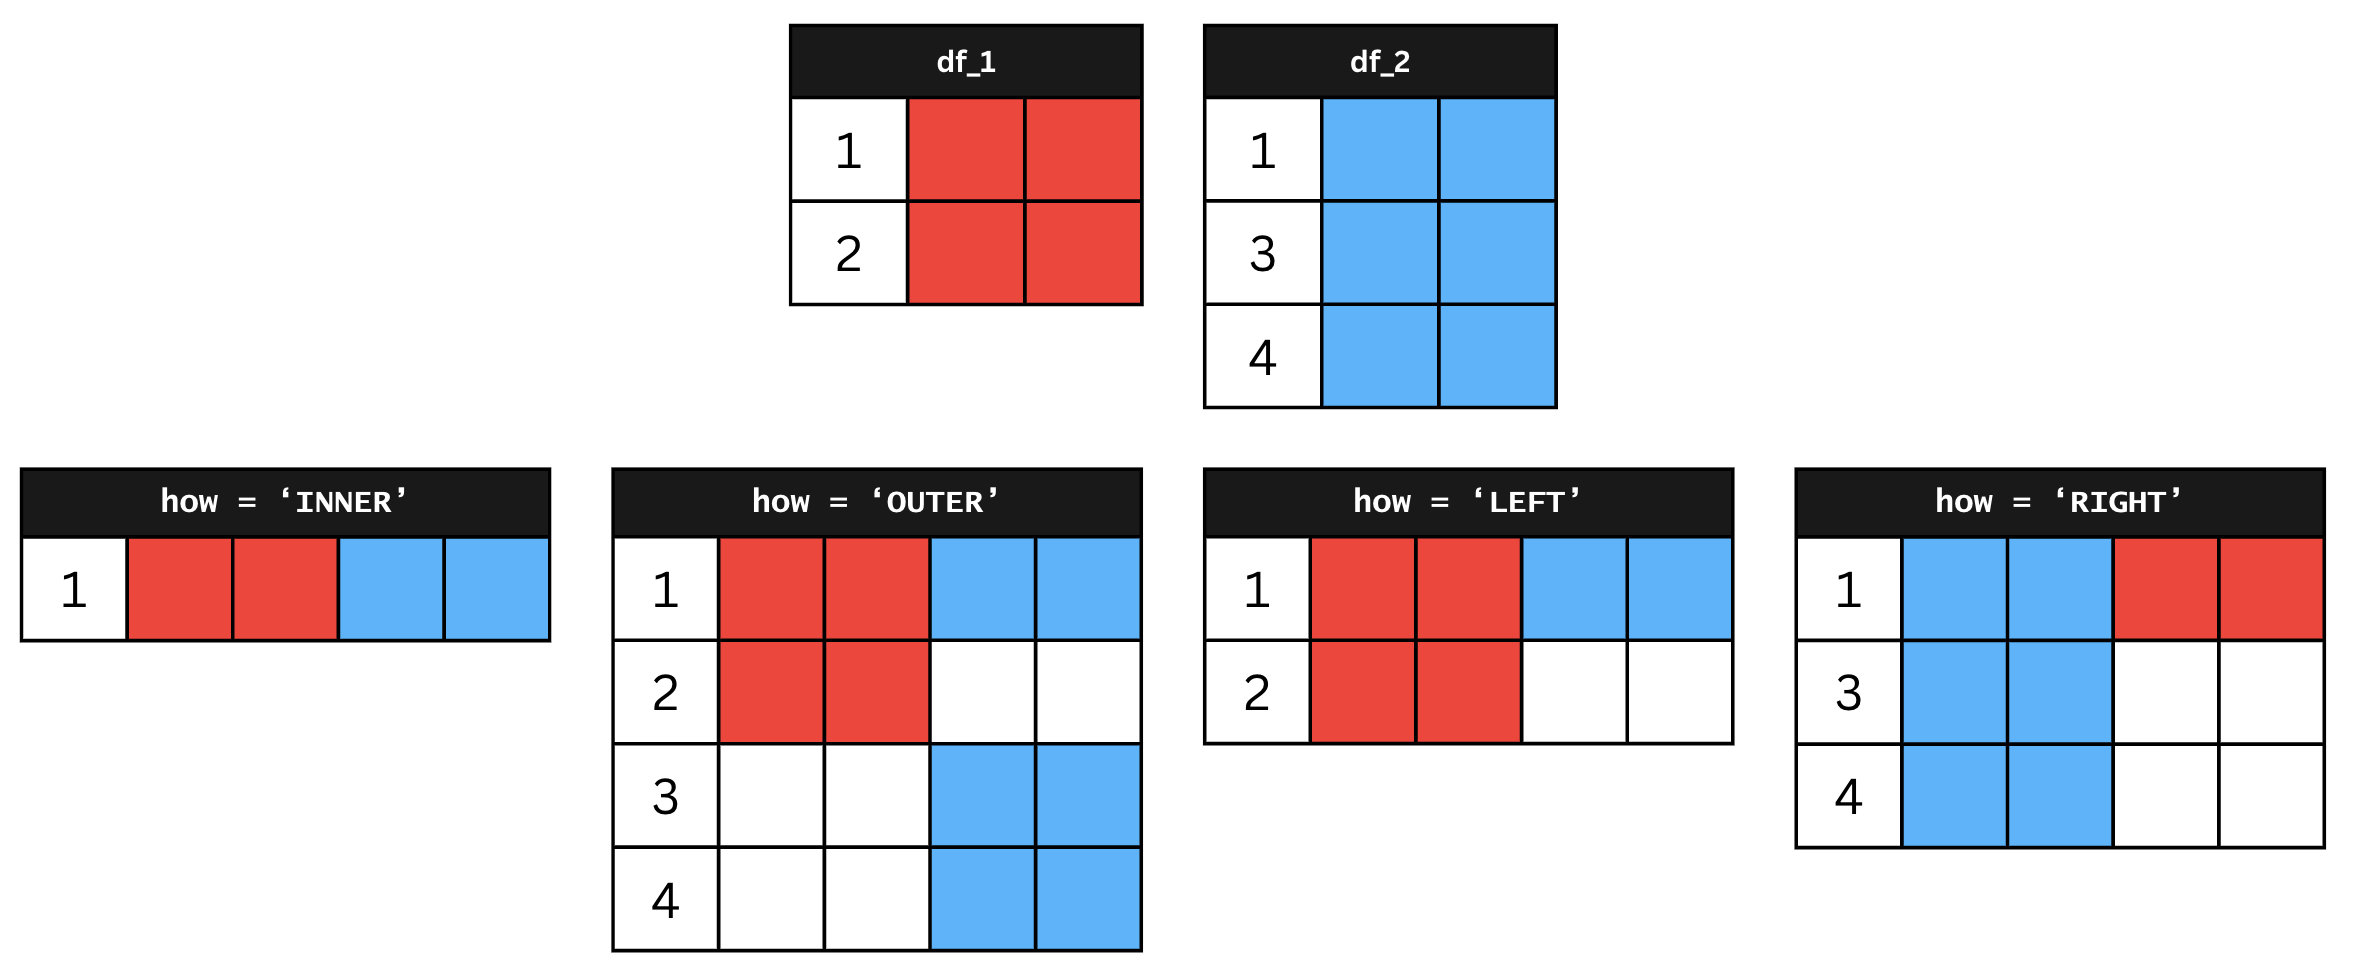

In [ ]:
# Create the users DataFrame
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

In [ ]:
# Create the roles DataFrame
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

#### merge dfs on the role id
`pd.merge(df_1, df_2, how='join_type', on='column_name')`

In [ ]:
# Remember their joining on a key that does NOT have
# the same column_name!


In [ ]:
#indicator argument shows where the data is coming from in merge



> **note:** use `pd.merge()` instead of `pd.join()`, because `pd.merge()` has more capabilities

___
## Part 3 - Reshaping DataFrames
- crosstab
- pivot table
- map


### Using `.crosstab`
COUNT the number of occurances between each subgroup
- format: `pd.crosstab(index=_, column=_)`

#### find all counts of the room and overall letter grade

#### add total counts

In [ ]:
#margins argument


#### give percentages instead of counts

In [ ]:
# True: will normalize over all values (12)


In [ ]:
# index: will normalize over each row


### Using `.pivot_table`

creates a summary table similar to excel pivot table 

need to include 3 of the following:
- which values will make up the rows (the index)
- which values will make up the columns
- the values we are aggregating
- an aggregation method (aggfunc); if we can omit this, and the average will be used by default

format: `pd.pivot_table(data=_, index=_, columns=_, values=_, aggfunc=_)`

#### show the average math grade by overall letter grade and room

In [ ]:
pd.pivot_table(data=df, index='room', columns='overall_letter',
              values='math')

#### show the MAX math grade by overall letter grade and room

In [ ]:
pd.pivot_table(data=df, index='room', columns='overall_letter',
              values='math', aggfunc='max')

> NOTE: `index` and `columns` should be categorical values, and `values` should be numeric

### Using `.map`

Use a dictionary to assign new values based on current values
1. create a dictionary of new values based on old
2. use map to apply it to df

- format: `.map({'old_value':'new_value'})`

#### create new df of restuarant data

In [ ]:
n = 40

df = pd.DataFrame({
    'drink': np.random.choice(['Tea', 'Water', 'Water'], n),
    
    'meal': np.random.choice(['Curry', 'Yakisoba Noodle', 'Pad Thai'], n),
})

df.sample(10)

#### create dictionary of prices for all current items

In [ ]:
#dictionary format: {key:value}
prices = {
    'Yakisoba Noodle': 9,
    'Curry': 11,
    'Pad Thai': 10,
    'Tea': 2,
    'Water': 0,
}
prices

#### map drink prices and meal prices to create bill
- bill will include price of both

In [ ]:
df.drink.head()

In [ ]:
df['bill'] = df.drink.map(prices) + df.meal.map(prices)

In [ ]:
df.head()

#### how many orders of each combination of meal and drink are there?

In [ ]:
pd.crosstab(df.meal, df.drink)

#### what percentage of each?

In [ ]:
pd.crosstab(df.meal, df.drink, normalize=True)

#### whats the average bill for each combination?

In [ ]:
pd.pivot_table(data=df, index='meal',columns='drink', values='bill', aggfunc='mean')

In [ ]:
pd.pivot_table(data=df, index='meal', values='bill', aggfunc='mean') 
#can group by only a row or only a column

#### we can also get this by using a groupby

In [ ]:
df.groupby(['meal','drink']).mean()

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
x = list(range(150))
y = list(range(50))

# Increase the figure size
plt.figure(figsize=(10, 6))

plt.xlabel('This is the x label')
plt.ylabel('This is the y label')
plt.title('This is the title')

# You need to specify labels for 
# the legend
plt.plot(x, label= 'Line X')
plt.plot(y, label= 'Line Y')

# Adding annotations to specific  
# points on the plot
plt.annotate('Point A', xy=(50, 50), xytext=(70, 40)
             , arrowprops=dict(facecolor='black'
             , arrowstyle='->'))
plt.annotate('Point B', xy=(100, 100), xytext=(80, 120)
             , arrowprops=dict(facecolor='black'
             , arrowstyle='->'))

# Display the legend
plt.legend()

plt.show()

In [ ]:
# using the variable ax for single a Axes
fig, ax = plt.subplots()

In [ ]:
# using the variable axs for multiple Axes
fig, axs = plt.subplots(1, 2)

In [ ]:
import matplotlib.pyplot as plt

# some data to play with
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
z = [1, 2, 3, 4, 5]

# sets up the figure container
# and the individual subplots/graphs
fig, (ax1, ax2) = plt.subplots(1, 2)

# 1st subplot
ax1.plot(x,y)
# and title
ax1.set_title('x by y Line')

# 2nd subplot
ax2.scatter(x,z)
# and title
ax2.set_title('x by z Scatter')

# Figure title
fig.suptitle('Student Demo')
plt.show()

In [ ]:
# using tuple unpacking for multiple Axes
# some data to play with
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
z = [1, 2, 3, 4, 5]

fig, axs = plt.subplots(1, 2)

axs[0].plot(x, y)
ax1.set_title('x by y Line')

axs[1].scatter(x, z)
ax2.set_title('x by z Scatter')

fig.suptitle('Student Demo')
plt.show()

In [ ]:
# using tuple unpacking for multiple Axes
# some data to play with
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
z = [1, 2, 3, 4, 5]

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0,0].plot(x, y)
axs[0,0].set_title('x by y Line')

axs[0,1].scatter(x, z)
axs[0,1].set_title('x by z Scatter')

axs[1,0].scatter(z, x)
axs[1,0].set_title('z by x Scatter')

axs[1,1].plot(y, z)
axs[1,1].set_title('y by z Line')

fig.suptitle('Student Demo')
plt.show()

In [ ]:
# using tuple unpacking for multiple Axes
# some data to play with
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
z = [1, 2, 3, 4, 5]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.plot(x, y)
ax2.plot(x, z)
ax3.plot(z, x)
ax4.plot(y, z)
